<a href="https://colab.research.google.com/github/ChristopheMpagaDSTI/python_lab/blob/main/Binary_Classification_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


We need to train a model that predicts if a customer will leave the bank or not.



In [15]:
import pandas as pd

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
from tensorflow import keras
my_trained_model = keras.models.load_model('/content/drive/MyDrive/ANN_DSTI/Colab Notebooks/Churn_Model.h5')


In [18]:
#Kaggle database (source: https://www.kaggle.com/aakash50897/churn-modellingcsv?select=Churn_Modelling.csv)
dataset = pd.read_csv('/content/drive/MyDrive/ANN_DSTI/Colab Notebooks/Churn_Modelling.csv')  
dataset.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [19]:
print(dataset.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [20]:
print(dataset.index)

RangeIndex(start=0, stop=10000, step=1)


In [21]:
#Not all independent variables are important for the result (such as RowNumber, CustomerId)
X = dataset.iloc[:, 3: 13].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [22]:
#labels aka response variable 
y = dataset.iloc[:, 13].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [31]:
#Data encoding :
#We have to encode categorical data (such as Geography and Gender)
#ORDINAL ENCODING - way 1:
from sklearn.preprocessing import LabelEncoder

X_ord_1 = dataset.iloc[:, 3: 13].values

labelencoder_X = LabelEncoder() #instantiate an object of the class LabelEncoder
X_ord_1[:, 1] = labelencoder_X.fit_transform(X_ord_1[:, 1]) #ordinal encoding for column 1

X_ord_1[:, 2] = labelencoder_X.fit_transform(X_ord_1[:, 2]) #ordinal encoding for column 2

X_ord_1

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [24]:
#ORDINAL ENCODING - way 2:  #bug - sets all values to zero!
from sklearn.preprocessing import OrdinalEncoder

X_ord_2 = dataset.iloc[:, 3: 13].values

ordinal_encoder_1 = OrdinalEncoder()
X_ord_2[:, 1] = ordinal_encoder_1.fit_transform([X_ord_2[:, 1]])
X_ord_2[:, 2] = ordinal_encoder_1.fit_transform([X_ord_2[:, 2]])

X_ord_2
#X_ord_2.shape

array([[619, 0.0, 0.0, ..., 1, 1, 101348.88],
       [608, 0.0, 0.0, ..., 0, 1, 112542.58],
       [502, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [709, 0.0, 0.0, ..., 0, 1, 42085.58],
       [772, 0.0, 0.0, ..., 1, 0, 92888.52],
       [792, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [25]:
X = X_ord_1 
X

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [26]:
#ONE-HOT ENCODING :
#Way 1 : using data values :
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

ct = ColumnTransformer( #'encoder' is the name of the column transformer
    [('encoder', OneHotEncoder(), [1])],    # The column numbers to be transformed (here is [1] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)

X = np.array(ct.fit_transform(X), dtype=int) #Note: The X matrix should be ordinally encoded (with ordinal encoding applied to it)
df = pd.DataFrame(X)
df.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,619,0,42,2,0,1,1,1,101348
1,0,0,1,608,0,41,1,83807,1,0,1,112542
2,1,0,0,502,0,42,8,159660,3,1,0,113931
3,1,0,0,699,0,39,1,0,2,0,0,93826
4,0,0,1,850,0,43,2,125510,1,1,1,79084
5,0,0,1,645,1,44,8,113755,2,1,0,149756


In [28]:
#We remove the first column to avoid the dummy data trap
'''Dummy data trap : A scenario where independent variables are highly correlated (one variable predicts the value of others). 
In one-hot encoding, one dummy variable can be predicted through other dummy variables, thus causing redundancy
==> Using all dummy variables for regression models leads to dummy variable trap
==> We exclude one of those dummy variables.'''

X = X[:, 1:]
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,619,0,42,2,0,1,1,1,101348
1,0,1,608,0,41,1,83807,1,0,1,112542
2,0,0,502,0,42,8,159660,3,1,0,113931
3,0,0,699,0,39,1,0,2,0,0,93826
4,0,1,850,0,43,2,125510,1,1,1,79084


In [29]:
#ONE-HOT ENCODING : Way 2 : using data frame :
X_df = dataset.iloc[:, 3: 13]
X_df = pd.concat([X_df, pd.get_dummies(X_df['Geography'], prefix='country', drop_first=True)], axis=1)  #drops the first column
#axis = 1 means to concatenate along the columns (put one column beside another)
X_df.drop(['Geography'], axis=1, inplace=True)  #get rid of the original Geography column
X_df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0


In [35]:
# Split the data into training and test set (20% for the test set)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 1) # We use random_state to make sure splitting contains the same data each time.


In [ ]:
#Standardise the data (x_standardised = (x - x_mean)/std_dev)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # create a scaler object for standardizing data 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #note that we use the scale set from the training set to transform the test set
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1.714901,-0.572731,-0.230820,0.915091,-0.944500,-0.701742,0.588164,0.802257,-1.553374,0.977259,0.427402
1,-0.583124,-0.572731,-0.251509,-1.092788,-0.944500,-0.355203,0.469851,0.802257,-1.553374,-1.023271,-1.025493
2,1.714901,-0.572731,-0.396330,-1.092788,0.774987,0.337876,0.858782,-0.911510,0.643760,0.977259,-0.944793
3,1.714901,-0.572731,-0.044622,-1.092788,1.252622,0.337876,0.565605,0.802257,-1.553374,0.977259,-0.551941
4,-0.583124,1.746019,0.658795,0.915091,-0.562392,1.030954,0.730400,-0.911510,-1.553374,-1.023271,1.083388
...,...,...,...,...,...,...,...,...,...,...,...
7995,1.714901,-0.572731,-0.303231,0.915091,0.774987,0.684415,0.495441,-0.911510,0.643760,0.977259,-0.579177
7996,1.714901,-0.572731,0.348464,-1.092788,2.303420,-0.701742,0.076671,-0.911510,0.643760,-1.023271,-0.529777
7997,-0.583124,-0.572731,0.224332,-1.092788,0.583933,1.377494,-1.225991,-0.911510,0.643760,0.977259,-0.140972
7998,-0.583124,-0.572731,0.131233,-1.092788,0.010771,1.030954,-1.225991,0.802257,0.643760,0.977259,0.017805


============ Modelling ===========

In [36]:
#@title ANN model
#Building the model : 
#We use 2 dense layers

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

#add first hidden layer
model.add(tf.keras.layers.Dense(units=6, # number of neurons 
                                kernel_initializer='uniform', # initialized weight and bias 
                                activation='relu') # activation function. 
)

#add 2nd hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))

'''The number of units is mainly chosen by experience. In general, based on experimentation, 
setting it to the average between the number of the input nodes (11) and the number of the 
ouput nodes (1). Cross-validation can also be used to choose to choose the best parameters (parameter tuning).'''

'''random_uniform: Weights are initialized to uniformly random small values between -0.05 to 0.05.
random_normal: Weights are initialized according to a Gaussian distribution, with zero mean and a small standard deviation of 0.05.
zero: All weights are initialized to zero.'''

'random_uniform: Weights are initialized to uniformly random small values between -0.05 to 0.05.\nrandom_normal: Weights are initialized according to a Gaussian distribution, with zero mean and a small standard deviation of 0.05.\nzero: All weights are initialized to zero.'

In [ ]:
#Add the output layer
model.add(keras.layers.Dense(units=1,
                             kernel_initializer='uniform',
                             activation='sigmoid')) #Sigmoid for binary, Softmax for multiclass

In [ ]:
#Compilation
model.compile(optimizer = 'adam', # for back propagation 
              loss ='binary_crossentropy', # error function 
              metrics = ['accuracy'] # performance metric 
              )

In [ ]:
'''
Note: If you want to personalize an optimizer, do the following:
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)
'''

'''
Here are the parameters of the Adam optimizer:
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)
'''

'\nHere are the parameters of the Adam optimizer:\ntf.keras.optimizers.Adam(\n    learning_rate=0.001,\n    beta_1=0.9,\n    beta_2=0.999,\n    epsilon=1e-07,\n    amsgrad=False,\n    name="Adam",\n    **kwargs\n)\n'

In [ ]:
'''
Note: You can use a learning rate schedule to modulate how the learning rate of your optimizer changes over time
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
'''

'\nNote: You can use a learning rate schedule to modulate how the learning rate of your optimizer changes over time\nlr_schedule = keras.optimizers.schedules.ExponentialDecay(\n    initial_learning_rate=1e-2,\n    decay_steps=10000,\n    decay_rate=0.9)\noptimizer = keras.optimizers.SGD(learning_rate=lr_schedule)\n'

In [ ]:
#Training
history = model.fit(X_train, y_train, batch_size = 10, epochs = 200, verbose=0)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8395


In [ ]:
#Evaluation
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

63/63 [==============================] - 0s 1ms/step
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
#Predict using the info of a new customer
new_customer = [[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]
new_customer = sc.transform(new_customer)
new_prediction = model.predict(new_customer)
new_prediction = (new_prediction > 0.5)
print(new_prediction)

1/1 [==============================] - 0s 23ms/step
[[False]]


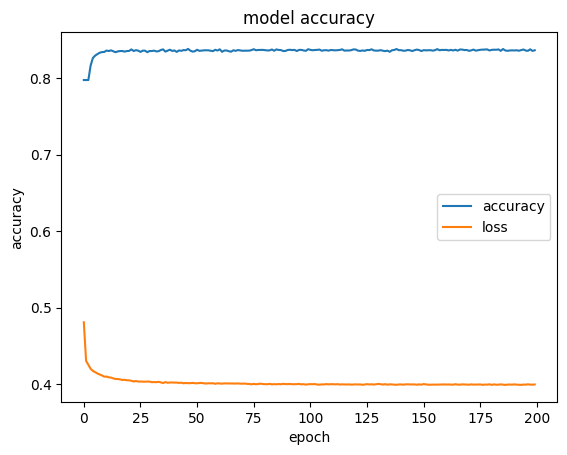

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'])
plt.show()

In [ ]:
#Note : An alternative to using train_test_split() is to specify a validation_split percentage. 
#This is done when fitting the model, for example:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

history = model.fit(X,y, verbose = 0,
                    validation_split = 0.2, # split data in 80-20 sets
                    epochs = 100,
                    batch_size = 10)

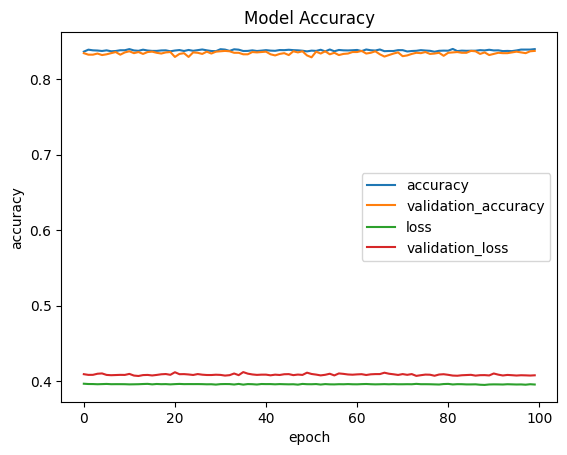

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['accuracy','validation_accuracy', 'loss', 'validation_loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/ANN_DSTI/Colab Notebooks/Churn_Model.h5')

In [ ]:
my_trained_model = keras.models.load_model('/content/drive/MyDrive/ANN_DSTI/Colab Notebooks/Churn_Model.h5')